In [1]:
!pip install matplotlib
%matplotlib notebook

You should consider upgrading via the '/home/shakul/anaconda3/bin/python -m pip install --upgrade pip' command.


<IPython.core.display.Javascript object>


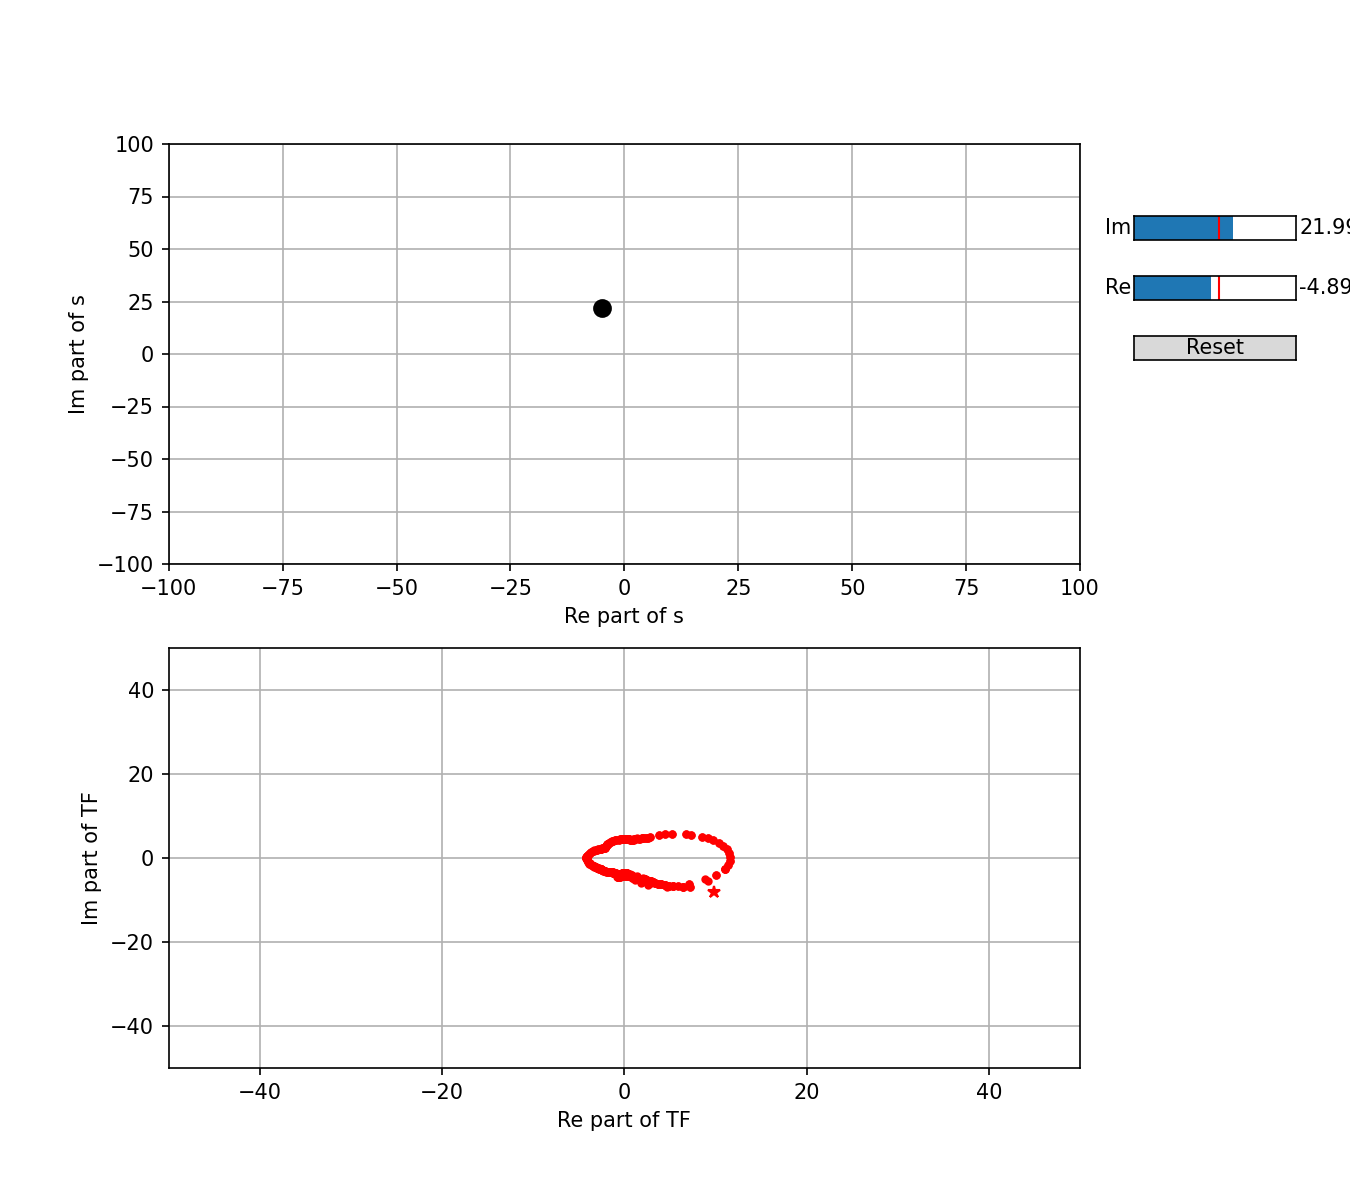

In [4]:
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

N = 1
xmin = 0
xmax = 10
x = np.linspace(5,6,N)

#spline fit
yvals = x

#figure.subplot.right
mpl.rcParams['figure.subplot.right'] = 0.8

#set up a plot
fig,axes = plt.subplots(2,1,figsize=(9.0,8.0),sharex=False)
ax1 = axes[0]
ax2 = axes[1]


pind = None #active point
epsilon = 10 #max pixel distance

    
def TF(x1,y1):
    val = {"x": np.real(100/(1+x1+1j*y1)),
           "y": np.imag(100/(1+x1+1j*y1)) }
    return val


def update(val):
    global yvals
    # update curve
    for i in np.arange(N):
      yvals[i] = sliders[i].val     
    x = sliders[1].val
    l.set_ydata(yvals)
    l.set_xdata(x)
    Z = TF(x,yvals)
    ax2.plot(Z['x'],Z['y'],'r.',label='mapped')
#     n.set_xdata(np.real(1/(1+x+1j*yvals)))
#     n.set_ydata(np.imag(1/(1+x+1j*yvals)))
    # redraw canvas while idle
    fig.canvas.draw_idle()


def reset(event):
    global yvals
    #reset the values
    for i in np.arange(N):
      sliders[i].reset()
    sliders[1].reset()
    ax2.clear()
    Z = TF(yvals,yvals)
    n, = ax2.plot(Z['x'],Z['y'],'r*',label='mapped')
    ax2.set_xlim(-50, 50)
    ax2.set_ylim(-50, 50)
    ax2.set_xlabel('Re part of TF')
    ax2.set_ylabel('Im part of TF')
    ax2.grid(True)
    ax2.yaxis.grid(True,which='minor',linestyle='--')
    # redraw canvas while idle
    fig.canvas.draw_idle()

def button_press_callback(event):
    'whenever a mouse button is pressed'
    global pind
    if event.inaxes is None:
        return
    if event.button != 1:
        return
    #print(pind)
    pind = get_ind_under_point(event)    

def button_release_callback(event):
    'whenever a mouse button is released'
    global pind
    if event.button != 1:
        return
    pind = None

def get_ind_under_point(event):
    'get the index of the vertex under point if within epsilon tolerance'

    # display coords
    #print('display x is: {0}; display y is: {1}'.format(event.x,event.y))
    t = ax1.transData.inverted()
    tinv = ax1.transData 
    xy = t.transform([event.x,event.y])
    #print('data x is: {0}; data y is: {1}'.format(xy[0],xy[1]))
    xr = np.reshape(x,(np.shape(x)[0],1))
    yr = np.reshape(yvals,(np.shape(yvals)[0],1))
    xy_vals = np.append(xr,yr,1)
    xyt = tinv.transform(xy_vals)
    xt, yt = xyt[:, 0], xyt[:, 1]
    d = np.hypot(xt - event.x, yt - event.y)
    indseq, = np.nonzero(d == d.min())
    ind = indseq[0]

    #print(d[ind])
    if d[ind] >= epsilon:
        ind = None
    
    #print(ind)
    return ind

def motion_notify_callback(event):
    'on mouse movement'
    global yvals
    if pind is None:
        return
    if event.inaxes is None:
        return
    if event.button != 1:
        return
    
    #update yvals
    #print('motion x: {0}; y: {1}'.format(event.xdata,event.ydata))
    yvals[pind] = event.ydata 
    x = event.xdata
    # update curve via sliders and draw
    sliders[pind].set_val(yvals[pind])
    sliders[1].set_val(x)
    fig.canvas.draw_idle()

l, = ax1.plot (x,yvals,color='k',linestyle='none',marker='o',markersize=8)
Z = TF(x,yvals)
n, = ax2.plot(Z['x'],Z['y'],'r*',label='mapped')

ax1.set_yscale('linear')
ax1.set_xlim(-100, 100)
ax1.set_ylim(-100,100)
ax2.set_xlim(-50,50)
ax2.set_ylim(-50, 50)
ax1.set_xlabel('Re part of s')
ax1.set_ylabel('Im part of s')
ax2.set_xlabel('Re part of TF')
ax2.set_ylabel('Im part of TF')
ax1.grid(True)
ax2.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax2.yaxis.grid(True,which='minor',linestyle='--')

sliders = []

for i in np.arange(N):

    axamp = plt.axes([0.84, 0.8-(i*0.05), 0.12, 0.02])
    # Slider
    s = Slider(axamp, 'Im'.format(i), -100, 100, valinit=yvals[i])
    sliders.append(s)

axamp = plt.axes([0.84, 0.8-(1*0.05), 0.12, 0.02])
s = Slider(axamp, 'Re'.format(1), -100, 100, valinit=int(x))
sliders.append(s)

for i in np.arange(N+1):
    #samp.on_changed(update_slider)
    sliders[i].on_changed(update)

axres = plt.axes([0.84, 0.8-((N+1)*0.05), 0.12, 0.02])
bres = Button(axres, 'Reset')
bres.on_clicked(reset)

fig.canvas.mpl_connect('button_press_event', button_press_callback)
fig.canvas.mpl_connect('button_release_event', button_release_callback)
fig.canvas.mpl_connect('motion_notify_event', motion_notify_callback)

plt.show(block=False)
plt.show(block=False)

